In [1]:
import ROOT
from ROOT import *

Welcome to JupyROOT 6.24/02


 Get the data and background histogram files
 
 Make a dictionary contains of data and MC histo files for later

In [2]:
inputfilepath='../inputfiles/'

WorkdayTag= '_Sep6_v0'

AnalysisName= 'VLL2018_'

dataAndMCbundle=['Data','wjets','zjets','ttjets','tW','STtchannelTop','WW2Q','QCDMultijet']
FileName=['data', 'wjets', 'zjets', 'ttjets', 'tW', 'ST', 'WW2Q','QCD']
#dataAndMCbundle=['Data','wjets','zjets','ttjets','tW','STtchannelTop','WW2Q']
#FileName=['data', 'wjets', 'zjets', 'ttjets', 'tW', 'ST', 'WW2Q']
FilesDict={}
for ifile,file in enumerate(dataAndMCbundle):
    file_ifile=TFile.Open(inputfilepath+AnalysisName+dataAndMCbundle[ifile]+WorkdayTag+'.root','READ')
    FilesDict[FileName[ifile]]=file_ifile
        
FilesDict

{'data': <cppyy.gbl.TFile object at 0x4dcf920>,
 'wjets': <cppyy.gbl.TFile object at 0x345aed0>,
 'zjets': <cppyy.gbl.TFile object at 0x41db570>,
 'ttjets': <cppyy.gbl.TFile object at 0x4267390>,
 'tW': <cppyy.gbl.TFile object at 0x4267b10>,
 'ST': <cppyy.gbl.TFile object at 0x1efd6c0>,
 'WW2Q': <cppyy.gbl.TFile object at 0x1ebff70>,
 'QCD': <cppyy.gbl.TFile object at 0x85ae120>}

In [3]:
CrossSectionDB={
    'data':1,
    'wjets':50380,
    'zjets':5765,
    'ttjets':365.34,
    'tW':34.91,
    'ST':136.02,
    'WW2Q':45.68,
    'QCD':239400    
}

OverlayColorScheme={
    'data':kBlack,
    'wjets':kGray+1,
    'zjets':kRed-9,
    'ttjets':kCyan-10,
    'tW':kBlue-9,
    'ST':kBlue-7,
    'WW2Q':kGreen-4,
    'QCD':kYellow    
}

StackingColorScheme={
    'data':kBlack,
    'wjets':kGray+1,
    'zjets':kRed-9,
    'ttjets':kCyan-10,
    'tW':kBlue-9,
    'ST':kBlue-5,
    'WW2Q':kGreen-10,
    'QCD':kYellow-10    
}                 

Lets take one variable for plotting
 - **Type:**  " ","_highMVA","_regA","_regB","_regC","_regD"
 

In [4]:
var='mtjet0'
Type=["","_highMVA","_regA","_regB","_regC","_regD"]
Description=['Basic WjetsCR','High MVA region','Region A','Region B','Region C','Region D']
Plotname = var+Type[0]+'_l2j'
print('We want to plot '+ Plotname + ' at '+ Description[0])

We want to plot mtjet0_l2j at Basic WjetsCR


In [5]:
FilesDict['data'].Get(Plotname)

In [6]:
#Count Events in histogram
def Count(histo):                                                               
    n_count="{:.3f}".format(histo.Integral())                                   
    return str(n_count) 

Let get the corresponding histogram from their TFiles

In [7]:
HistoDict={}
histogram=[]
dataLumi=59.7*1000 #in pb

for index,(filekey,file) in enumerate(FilesDict.items()):
    #print(filekey,file)
    histo= file.Get(Plotname)
    histo.SetDirectory(0)
    histoevent=float(Count(histo))
    
    #LumiCorr-------------------------------
    totEvent=file.nEvents.GetBinContent(2)
    Xsec=CrossSectionDB[filekey]
    sampleLumi=totEvent/Xsec
    if(filekey!='data'): lumi_corr=dataLumi/sampleLumi
    else: lumi_corr=1
    #print(filekey,totEvent,Xsec,sampleLumi,lumi_corr)    
    histo.Scale(lumi_corr)
    histoeventAfterCorr=float(Count(histo))
    #---------------------------------------
    histogram.append([filekey,histoevent,histoeventAfterCorr,OverlayColorScheme[filekey],histo])
    HistoDict[filekey]=[filekey,histoevent,histoeventAfterCorr,OverlayColorScheme[filekey],histo]
    

In [8]:
histogram

[['data', 2200913.0, 2200913.0, 1, <cppyy.gbl.TH1F object at 0x7fd2b20>],
 ['wjets', 24415.0, 1279260.417, 921, <cppyy.gbl.TH1F object at 0x878ca70>],
 ['zjets', 32652.0, 112696.473, 623, <cppyy.gbl.TH1F object at 0x8756700>],
 ['ttjets', 417770.0, 99024.552, 422, <cppyy.gbl.TH1F object at 0x33ec250>],
 ['tW', 45837.0, 9953.129, 591, <cppyy.gbl.TH1F object at 0x8762360>],
 ['ST', 7040.0, 4095.597, 593, <cppyy.gbl.TH1F object at 0x8750820>],
 ['WW2Q', 41762.0, 24318.957, 412, <cppyy.gbl.TH1F object at 0x33f6900>],
 ['QCD', 1018.0, 656405.56, 400, <cppyy.gbl.TH1F object at 0x8786e00>]]

In [9]:
def SortDict(dic,opt):
    return dict(sorted(dic.items(),key=lambda x:x[1][1],reverse=opt))    

In [10]:
HistoDict=SortDict(HistoDict,True) ## Sort the dict in terms of no of events
                                   ## Sort(dic,True)==Descending order 
                                   ## Sort(dic,False)==Ascending order

In [11]:
HistoDict.keys()

dict_keys(['data', 'ttjets', 'tW', 'WW2Q', 'zjets', 'wjets', 'ST', 'QCD'])

Make a copy of this dictionary to plot overlay histogram

In [12]:
import copy
HistoDictForOverlay=copy.deepcopy(HistoDict)

## Lets overlay them for shape study

In [13]:
import plot_settings as plotsetting

plotsetting.PlotRatioPad=False
plotsetting.year=2018                                                                                                           
plotsetting.publicationStyle=True                                                                                           

In [14]:
#bkgBundle=['wjets', 'zjets', 'ttjets', 'tW', 'ST', 'WW2Q','QCD']
bkgBundle=list(HistoDictForOverlay.keys())[1:]

0.23761878907680511
0.24936187267303467
0.2492217868566513
0.4444444477558136
0.3136596381664276
0.29673296213150024
0.5294695496559143


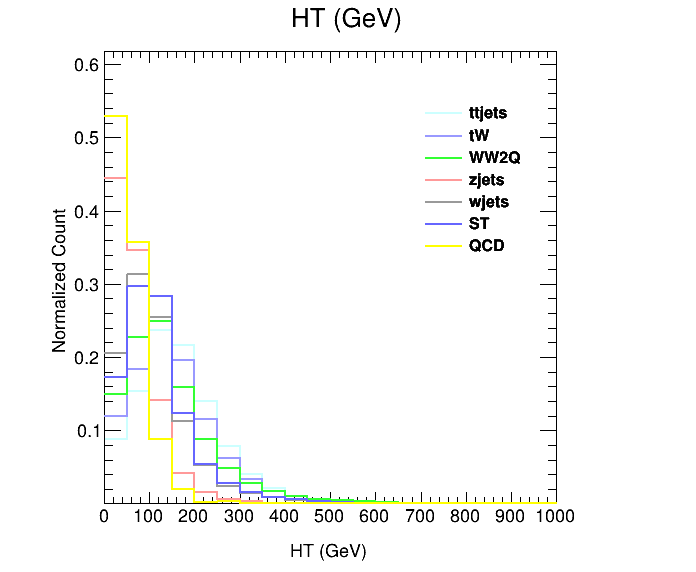

In [15]:
canvas=TCanvas("canvas","",700,600)
mainpad=plotsetting.CreatePad("mainpad",0,1)
mainpad.SetLogy(0)
mainpad.Draw()
mainpad.cd()
#Legend
legend=TLegend(0.60,0.55,0.90,0.82)
plotsetting.SetLegendStyle(legend)
for imc,mc in enumerate(bkgBundle):
    histoname=HistoDictForOverlay[mc][0]
    color=HistoDictForOverlay[mc][3]
    histo=HistoDictForOverlay[mc][-1]
    histo.Draw("HIST SAME")
    histo.Rebin(50)
    histo.Scale(1/float(Count(histo)))
    plotsetting.SetOverlayHistoStyle(histo,color,2,"HT (GeV)")
    #histo.SetLineColor(color)
    #histo.SetLineWidth(2)
    maxbin=histo.GetMaximumBin()
    maxheight=histo.GetBinContent(maxbin)
    histo.GetYaxis().SetRangeUser(0.001,(maxheight*2.6))
    #histo.GetYaxis().SetTitle('Normalized Count')
    
    print(histo.GetBinContent(maxbin))
    #histo.SetMarkerStyle(20)
    legend.AddEntry(histo,histoname,'l')
    legend.Draw()

    
canvas.Draw()

## Let's do Stack Histogramming and Plot data

Just check the Dictionary to see all component is present

In [16]:
HistoDict.values()

dict_values([['data', 2200913.0, 2200913.0, 1, <cppyy.gbl.TH1F object at 0x7fd2b20>], ['ttjets', 417770.0, 99024.552, 422, <cppyy.gbl.TH1F object at 0x33ec250>], ['tW', 45837.0, 9953.129, 591, <cppyy.gbl.TH1F object at 0x8762360>], ['WW2Q', 41762.0, 24318.957, 412, <cppyy.gbl.TH1F object at 0x33f6900>], ['zjets', 32652.0, 112696.473, 623, <cppyy.gbl.TH1F object at 0x8756700>], ['wjets', 24415.0, 1279260.417, 921, <cppyy.gbl.TH1F object at 0x878ca70>], ['ST', 7040.0, 4095.597, 593, <cppyy.gbl.TH1F object at 0x8750820>], ['QCD', 1018.0, 656405.56, 400, <cppyy.gbl.TH1F object at 0x8786e00>]])

In [17]:
##Test
#print(Count(HistoDict['wjets'][-1]))
if(float(Count(HistoDict['wjets'][-1]))<10):
    print("**************")
    print("Caution!!!!!!!!!!!!!!!! The histograms in dictionary is already normalized to 1")
    print("Please make a deep copy of the master dictionary and use them")
    print("**************")
else:
    print("Wjets= ",Count(HistoDict['wjets'][-1]))

Wjets=  1279260.417


In [18]:
###Sorting based on lumi corrected weight
HistoDict=dict(sorted(HistoDict.items(),key=lambda x:x[1][2],reverse=False))
print("         Summary Report                ")
print("_________________________________________")
print("   ")
print( "  Name"+"     "+"    No of Events ")
print("--------"+"    "+"-------------------")
exp=0
for key in HistoDict.keys():
    if(key!='data'): exp=exp+HistoDict[key][2]
    print(" "+ key+"          " +str(HistoDict[key][2]))
print("_________________________________________")
print("    ")
print("obs="+str(HistoDict['data'][2])+", "+"exp="+str(exp))
print("obs/exp=",str((HistoDict['data'][2]/exp))[:5])
print("_________________________________________")
print("                                         ")
obs=HistoDict['data'][2]
bkgBundle=list(HistoDict.keys())[:-1]
print("Background Bundle=",bkgBundle)    

         Summary Report                
_________________________________________
   
  Name         No of Events 
--------    -------------------
 ST          4095.597
 tW          9953.129
 WW2Q          24318.957
 ttjets          99024.552
 zjets          112696.473
 QCD          656405.56
 wjets          1279260.417
 data          2200913.0
_________________________________________
    
obs=2200913.0, exp=2185754.685
obs/exp= 1.006
_________________________________________
                                         
Background Bundle= ['ST', 'tW', 'WW2Q', 'ttjets', 'zjets', 'QCD', 'wjets']


Now Lets make the plot

In [19]:
rebin=50   ###BinWidth

In [20]:
dataHisto=HistoDict['data'][-1]
dataHisto.Rebin(rebin)
plotsetting.SetOverflowBin(dataHisto)

In [21]:
##Stacking(ALL MC Backgrounds)
stack=THStack()
ratioHisto=dataHisto.Clone()
h_Allbkg=HistoDict['ST'][-1].Clone()
h_Allbkg.Rebin(rebin)
for imc,mc in enumerate(bkgBundle):
    histoname=HistoDict[mc][0]
    color=HistoDict[mc][3]
    histo=HistoDict[mc][-1]    
    ##SetStyle
    histo.SetLineWidth(0)                                                                                                       
    histo.SetLineColor(1)                                                                                                       
    histo.SetFillColor(color)                                                                                             
    histo.Rebin(rebin)
    plotsetting.SetOverflowBin(histo)
    stack.Add(histo)                                                                                                            
    #Denominotor for ratioPlot
    if(imc>0): h_Allbkg.Add(histo)
ratioHisto.Divide(h_Allbkg)        

True

In [22]:
import plot_settings as plotsetting
plotsetting.PlotRatioPad=True
plotsetting.year=2018                                                                                                           
plotsetting.publicationStyle=False
plotsetting.WorkInProgress=True

In [23]:
##Obs/Exp Legend
ratioleg = ROOT.TLegend(0.99, 0.90, 0.81,0.87)
plotsetting.SetLegendStyle(ratioleg)
ratioleg.SetTextSize(0.03)
ratioleg.SetHeader("obs/exp="+(str(obs/exp)[:5]))

##Legend Settings
legend = ROOT.TLegend(0.99, 0.45, 0.80,0.86) 
plotsetting.SetLegendStyle(legend)
legend.AddEntry(dataHisto,"Data ["+plotsetting.Count(dataHisto)+"]","ep")
for imc,mc in reversed(list(enumerate(bkgBundle))):
    histoname=HistoDict[mc][0]
    color=HistoDict[mc][3]
    histo=HistoDict[mc][-1]    
    legend.AddEntry(histo,histoname+"["+Count(histo)+"]","lf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file ../output/VLL2018_WJetCR_mtjet0_l2j.pdf has been created


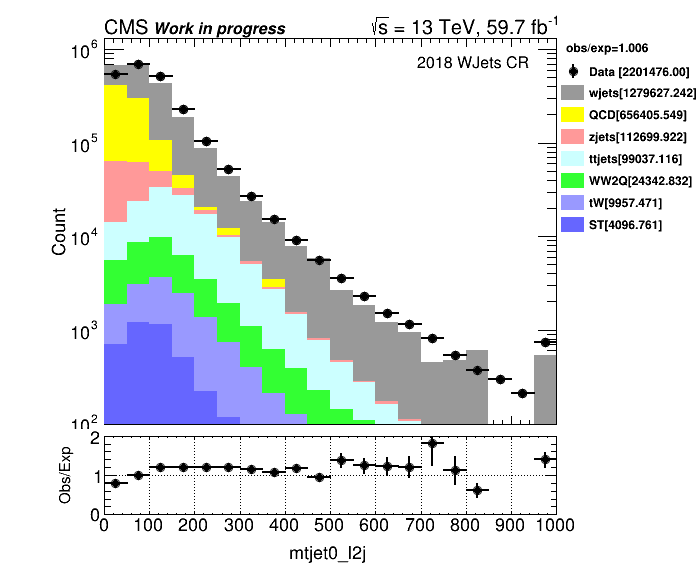

In [24]:
##Plotting
canvas=TCanvas("canvas","",700,600)                                                                                             
pad=plotsetting.CreatePad("pad",0,1.0)                                                                                          
#pad.SetLogy(0)
pad.Draw()                                                                                                                      

#RatioPad                                                                                                                       
if(plotsetting.PlotRatioPad==True):                                                                                                         
    ratioPad = plotsetting.CreateRatioPad('ratioPad',0,0.25)                                                                    
    ratioPad.SetGrid(1)                                                                                                         
    ratioPad.Draw()                                                                                                             

pad.cd()                                                                                                                        
##MainPadStyle 
pad.SetFillStyle(4000)
plotsetting.SetHistoStyle(dataHisto,xlabel=Plotname)                                                                        
##Draw                                                                                                                          
dataHisto.Draw("ep")                                                                                                            
stack.Draw("HIST SAME")                                                                                                         
dataHisto.Draw("ep same")                                                                                                       
legend.Draw("SAME")
ratioleg.Draw("SAME")
plotsetting.CMSLabel(pad)
pad.SetTickx(1)
pad.Update()
##RatioPadDraw                                                                                                                  
if(plotsetting.PlotRatioPad==True):                                                                                                         
    ratioPad.cd()                                                                                                               
    plotsetting.SetRatioHistoStyle(ratioHisto,xlabel=Plotname)                                                              
    ratioHisto.Draw('ep')

#Extra Text
pad.cd()
plotsetting.DrawText(0.60,0.84,'2018 WJets CR')    

outputName=AnalysisName+'WJetCR_'+Plotname+'.pdf'
canvas.SaveAs('../output/'+outputName)
#print(outputName)
canvas.Draw()

In [25]:
#canvas.Clear()

## WJets Estimation Starts

### ABCD method

- **Signal Region:** Region A

- **Control Region:** Region B, Region C, Region D

We want to predict No of Wjet events in Region A(Signal Region), using the wjet yield taken from Region B, Region C, Region D

In our control region, we calculate no of wjet events in the following way,

>$$ N_{i}^{wjets}= N_{i}^{Data} - N_{i}^{otherBkg}, i= B,C,D $$

> $${N}_{A}^{wjets} = \frac{N_{C}^{wjets}}{N_{D}^{wjets}}*N_{B}^{wjets}$$





In [26]:
def GetHistoDict(region,var):

    HistoDict={}
    histogram=[]
    dataLumi=59.7*1000 #in pb

    #Create Plotname
    plotname=var+'_l2j_'+region

    for index,(filekey,file) in enumerate(FilesDict.items()):
        #print(filekey,file)
        histo= file.Get(plotname)
        histo.SetDirectory(0)
        histoevent=float(Count(histo))

        #LumiCorr-------------------------------
        totEvent=file.nEvents.GetBinContent(2)
        Xsec=CrossSectionDB[filekey]
        sampleLumi=totEvent/Xsec
        if(filekey!='data'): lumi_corr=dataLumi/sampleLumi
        else: lumi_corr=1
        #print(filekey,totEvent,Xsec,sampleLumi,lumi_corr)    
        histo.Scale(lumi_corr)
        histoeventAfterCorr=float(Count(histo))
        #---------------------------------------
        histogram.append([filekey,histoevent,histoeventAfterCorr,OverlayColorScheme[filekey],histo])
        HistoDict[filekey]=[filekey,histoevent,histoeventAfterCorr,OverlayColorScheme[filekey],histo]

    return HistoDict    

In [27]:
Region_A=GetHistoDict('regA','dijetmass')
Region_B=GetHistoDict('regB','dijetmass')
Region_C=GetHistoDict('regC','dijetmass')
Region_D=GetHistoDict('regD','dijetmass')

In [54]:
Region_A

{'data': ['data', 888357.0, 888357.0, 1, <cppyy.gbl.TH1F object at 0x942a640>],
 'wjets': ['wjets',
  10107.0,
  529571.372,
  921,
 'zjets': ['zjets',
  11451.0,
  39522.459,
  623,
 'ttjets': ['ttjets',
  310309.0,
  73552.935,
  422,
 'tW': ['tW', 31362.0, 6810.001, 591, <cppyy.gbl.TH1F object at 0x943bd50>],
 'ST': ['ST', 3348.0, 1947.736, 593, <cppyy.gbl.TH1F object at 0x942c280>],
 'WW2Q': ['WW2Q',
  24551.0,
  14296.603,
  412,
 'QCD': ['QCD', 399.0, 257274.872, 400, <cppyy.gbl.TH1F object at 0x943a9b0>]}

Predict Wjet yield from Data but shape from MC

In [29]:
def CalculateWjetYield(Dict):
    totOtherBkg=0
    for index,(histkey,hist) in enumerate(Dict.items()):
        #print(histkey,hist)    
        events=hist[2]
        
        if(histkey != 'data' and histkey != 'wjets'):
            totOtherBkg+=events
    return totOtherBkg        

In [30]:
#totOtherBkg=0
#for index,(histkey,hist) in enumerate(Region_A.items()):
#    #print(histkey,hist)    
#    events=hist[2]
        
#    if(histkey != 'data' and histkey != 'wjets'):
#        totOtherBkg+=events
            
#WjetFromData = Region_A['data'][2]-totOtherBkg
#WjetFromMC   = Region_A['wjets'][2]
#DataEvent    = Region_A['data'][2]

#print('No of Wjet events from MC= ',WjetFromMC)
#print('No of Wjet events from Data= ',WjetFromData)
#print('No of other background events= ',totOtherBkg)
#print('No of Data events=',DataEvent)

In [31]:
RegionBundle=[Region_A,Region_B,Region_C,Region_D]
WjetYield=[]

In [32]:
for ireg,reg in enumerate(RegionBundle):
    othbkg=CalculateWjetYield(reg)
    dataevent= reg['data'][2]
    wjetyield= dataevent-othbkg
    
    WjetYield.append(wjetyield)


In [33]:
WjetYield

[494952.394, 418312.868, 199869.73200000002, 181800.34100000001]

In [34]:
TransferFactor=WjetYield[2]/WjetYield[3]     ## 2 == Region C, 3== Region D ## Array starts at 0
print('Transfer factor=',TransferFactor)
print("   ")

Transfer factor= 1.0993914032317464
   


In [35]:
print('Predicted wjet yield in Signal Region A =',TransferFactor*WjetYield[1])
print("   ")
print('wjet yield from Wjet MC in Signal Region A = ', Region_A['wjets'][2])

YieldPredictedByABCD=TransferFactor*WjetYield[1]
YieldByWjetMC = Region_A['wjets'][2]

ABCDScalingFactor= "{:.3f}".format((YieldPredictedByABCD) / (YieldByWjetMC))
print("   ")
print('Correction Factor taken from ABCD method=', ABCDScalingFactor)

Predicted wjet yield in Signal Region A = 459889.57094041636
   
wjet yield from Wjet MC in Signal Region A =  529571.372
   
Correction Factor taken from ABCD method= 0.868


In [36]:
#Scale the corresponding wjet histogram in Region A

Region_A_PostABCD=copy.deepcopy(Region_A)

Region_A_PostABCD['wjets'][-1].Scale(float(ABCDScalingFactor))

In [37]:
##CheckPoint
#print("    ")
print("        Summary")
print("____________________________________")
print("    ")
print('Wjets events Before ABCD=',Count(Region_A['wjets'][-1]))
print("   ")
print('Wjets events After ABCD=',Count(Region_A_PostABCD['wjets'][-1]))
print("    ")
print('So we take wjet histogram shape from MC but scale the yield predicted by ABCD method')


        Summary
____________________________________
    
Wjets events Before ABCD= 529571.372
   
Wjets events After ABCD= 459667.955
    
So we take wjet histogram shape from MC but scale the yield predicted by ABCD method


Let's plot Stack Histogram

In [38]:
Region_A_PostABCD=dict(sorted(Region_A_PostABCD.items(),key=lambda x:x[1][2],reverse=False))

In [39]:
def PlotMaker(Dictionary,plotname,rebin): ## Give the dictionary of histograms
    Dict=copy.deepcopy(Dictionary)
    Dict=dict(sorted(Dict.items(),key=lambda x:x[1][2],reverse=False))
    #Background Bundle
    bkgBundle=list(Dict.keys())[:-1]
    print(bkgBundle)
    
    rebinning=rebin
    #DataHisto
    dataHisto=Dict['data'][-1]
    dataHisto.Rebin(rebinning)
    plotsetting.SetOverflowBin(dataHisto)
        
    ##Legend Settings
    legend = ROOT.TLegend(0.99, 0.45, 0.80,0.86) 
    plotsetting.SetLegendStyle(legend)
    legend.AddEntry(dataHisto,"Data ["+plotsetting.Count(dataHisto)+"]","ep")
    for imc,mc in reversed(list(enumerate(bkgBundle))):
        histoname=Dict[mc][0]
        color=Dict[mc][3]
        histo=Dict[mc][-1]    
        legend.AddEntry(histo,histoname+"["+Count(histo)+"]","lf")
        
    ##
    ##Stacking(ALL MC Backgrounds)
    stack=THStack()
    ratioHisto=dataHisto.Clone()
    h_Allbkg=Dict['ST'][-1].Clone()
    h_Allbkg.Rebin(rebin)
    for imc,mc in enumerate(bkgBundle):
        histoname=Dict[mc][0]
        color=Dict[mc][3]
        histo=Dict[mc][-1]    
        ##SetStyle
        histo.SetLineWidth(0)                                                                                                       
        histo.SetLineColor(1)                                                                                                       
        histo.SetFillColor(color)                                                                                             
        histo.Rebin(rebinning)
        plotsetting.SetOverflowBin(histo)
        stack.Add(histo)                                                                                                            
        #Denominotor for ratioPlot
        if(imc>0): h_Allbkg.Add(histo)
    ratioHisto.Divide(h_Allbkg)
    
    
    obs=float(Count(dataHisto))
    exp=float(Count(h_Allbkg))
    ##Legend Settings
    legend = ROOT.TLegend(0.99, 0.45, 0.80,0.86) 
    plotsetting.SetLegendStyle(legend)
    legend.AddEntry(dataHisto,"Data ["+plotsetting.Count(dataHisto)+"]","ep")
    for imc,mc in reversed(list(enumerate(bkgBundle))):
        histoname=Dict[mc][0]
        color=Dict[mc][3]
        histo=Dict[mc][-1]    
        legend.AddEntry(histo,histoname+"["+Count(histo)+"]","lf")
    ##Obs/Exp Legend
    ratioleg = ROOT.TLegend(0.99, 0.90, 0.81,0.87)
    plotsetting.SetLegendStyle(ratioleg)
    ratioleg.SetTextSize(0.03)
    ratioleg.SetHeader("obs/exp="+(str(obs/exp)[:5])) 
    
    ##Plotting
    canvas=TCanvas("c","",700,600)                                                                                             
    pad=plotsetting.CreatePad("pad",0,1.0)                                                                                          
    #pad.SetLogy(0)
    pad.Draw()                                                                                                                      

    #RatioPad                                                                                                                       
    if(plotsetting.PlotRatioPad==True):                                                                                                         
        ratioPad = plotsetting.CreateRatioPad('ratioPad',0,0.25)                                                                    
        ratioPad.SetGrid(1)                                                                                                         
        ratioPad.Draw()                                                                                                             

    pad.cd()                                                                                                                        
    ##MainPadStyle 
    pad.SetFillStyle(4000)
    plotsetting.SetHistoStyle(dataHisto,xlabel=Plotname)
    dataHisto.GetYaxis().SetRangeUser(0.1,1e7)
    ##Draw                                                                                                                          
    dataHisto.Draw("ep")                                                                                                            
    stack.Draw("HIST SAME")                                                                                                         
    dataHisto.Draw("ep same")                                                                                                       
    legend.Draw("SAME")
    ratioleg.Draw("SAME")
    plotsetting.CMSLabel(pad)
    pad.SetTickx(1)
    pad.Update()
    ##RatioPadDraw                                                                                                                  
    if(plotsetting.PlotRatioPad==True):                                                                                                         
        ratioPad.cd()                                                                                                               
        plotsetting.SetRatioHistoStyle(ratioHisto,xlabel=plotname)                                                              
        ratioHisto.Draw('ep')

    #Extra Text
    pad.cd()
    plotsetting.DrawText(0.60,0.84,'2018 WJets CR')    
    
    canvas.Draw()
    
    return canvas,stack,legend,ratioHisto,ratioleg

['ST', 'tW', 'WW2Q', 'zjets', 'ttjets', 'QCD', 'wjets']
    
REGION A


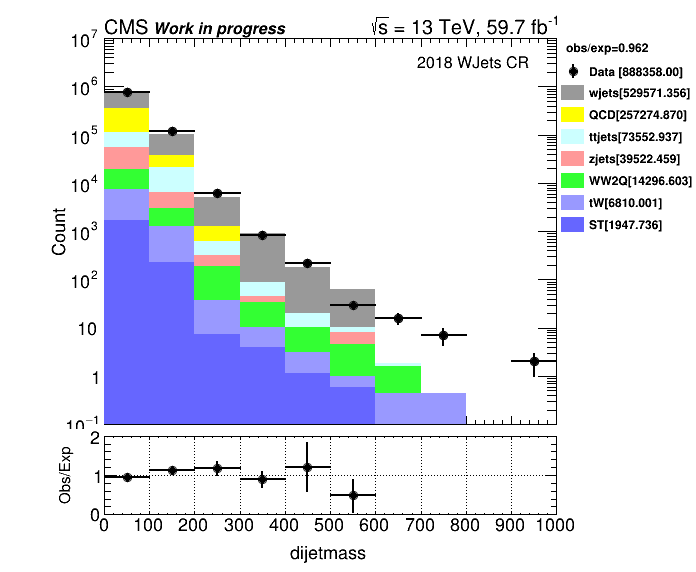

In [40]:
canvas,stack,legend,ratioHisto,ratioleg=PlotMaker(Region_A,'dijetmass',100)
print("    ")
print("REGION A")

['ST', 'tW', 'WW2Q', 'zjets', 'ttjets', 'QCD', 'wjets']
    
REGION A AFTER ABCD


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


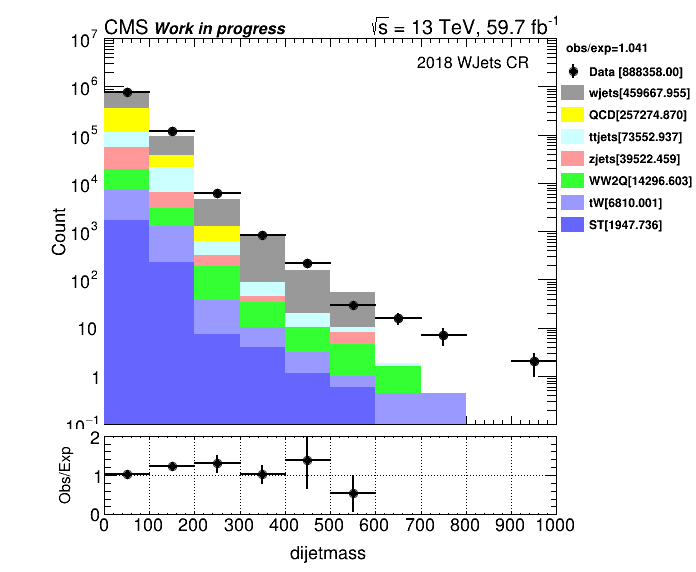

In [41]:
canvas,stack,legend,ratioHisto,ratioleg= PlotMaker(Region_A_PostABCD,'dijetmass',100)
print("    ")
print("REGION A AFTER ABCD")

['tW', 'ST', 'WW2Q', 'ttjets', 'zjets', 'QCD', 'wjets']


(<cppyy.gbl.TCanvas object at 0x84c88e0>,
 <cppyy.gbl.TLegend object at 0x940a580>)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


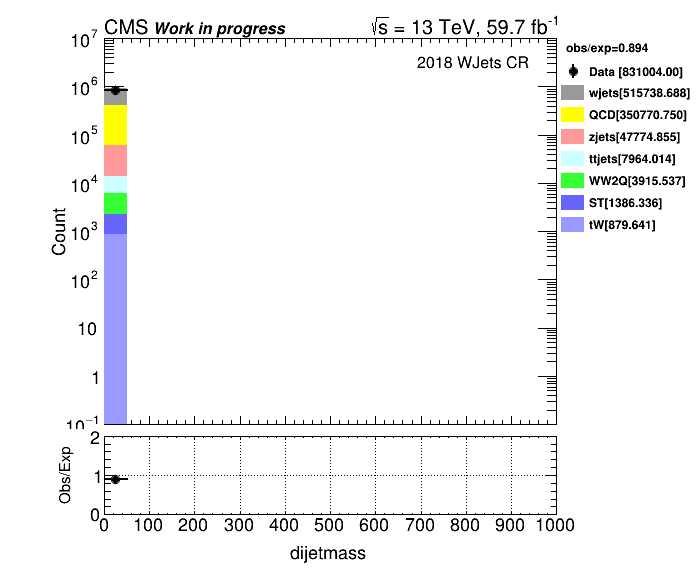

In [42]:
PlotMaker(Region_B,'dijetmass',50)

['ST', 'tW', 'WW2Q', 'zjets', 'ttjets', 'QCD', 'wjets']


(<cppyy.gbl.TCanvas object at 0x905f5e0>,
 <cppyy.gbl.TLegend object at 0x940a0e0>)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


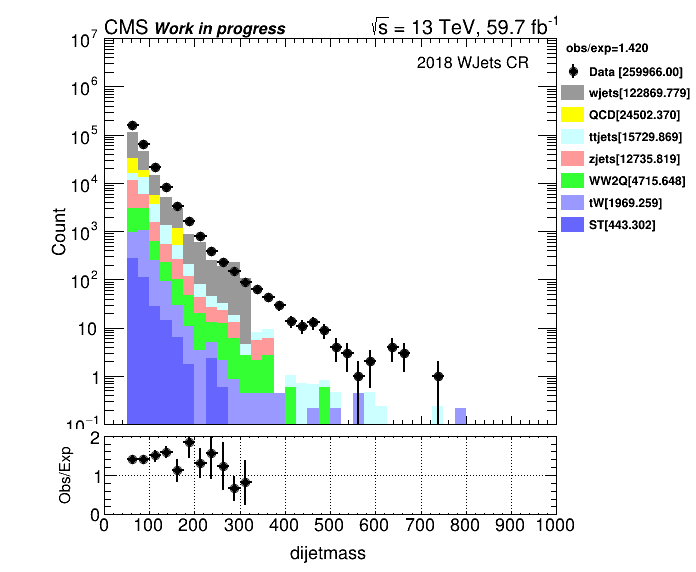

In [43]:
PlotMaker(Region_C,'dijetmass',25)

['tW', 'ST', 'WW2Q', 'ttjets', 'zjets', 'QCD', 'wjets']


(<cppyy.gbl.TCanvas object at 0x84c88e0>,
 <cppyy.gbl.TLegend object at 0x93d9600>)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


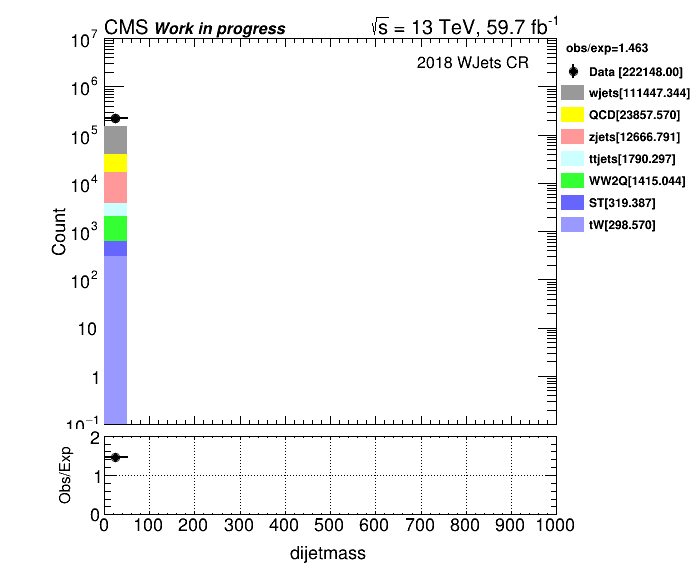

In [44]:
PlotMaker(Region_D,'dijetmass',50)

Let's take the wjet SHAPE from data and Yield also as previously described

In [45]:
bkgBundle

['ST', 'tW', 'WW2Q', 'ttjets', 'zjets', 'QCD', 'wjets']

In [46]:
dataHisto=Region_C['data'][-1]
wjetShapeHisto=dataHisto.Clone()
for ibkg,bkg in enumerate(bkgBundle):
    hist=Region_C[bkg][-1]
    if(bkg!='wjets'):
        wjetShapeHisto.Add(hist,-1)

In [47]:
print("Wjets events in the histogram drawn from C=",Count(wjetShapeHisto))
print("   ")
print('Wjets events After ABCD=',Count(Region_A_PostABCD['wjets'][-1]))

ScalingFactorFromShapeC = float("{:.4f}".format(float(Count(Region_A_PostABCD['wjets'][-1]))/float(Count(wjetShapeHisto))))
print("   ")
print("Scaling Factor From Region C for wjet shape",ScalingFactorFromShapeC)

Wjets events in the histogram drawn from C= 199869.730
   
Wjets events After ABCD= 459667.955
   
Scaling Factor From Region C for wjet shape 2.2998


In [48]:
Region_A_ShapeFromC=copy.deepcopy(Region_A)
Region_A_ShapeFromC['wjets'][-1]=wjetShapeHisto
Region_A_ShapeFromC['wjets'][-1].Scale(float(ScalingFactorFromShapeC))

In [49]:
Count(Region_A_ShapeFromC['wjets'][-1])

'459660.407'

['ST', 'tW', 'WW2Q', 'zjets', 'ttjets', 'QCD', 'wjets']


(<cppyy.gbl.TCanvas object at 0x905f5e0>,
 <cppyy.gbl.TLegend object at 0x8746300>)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


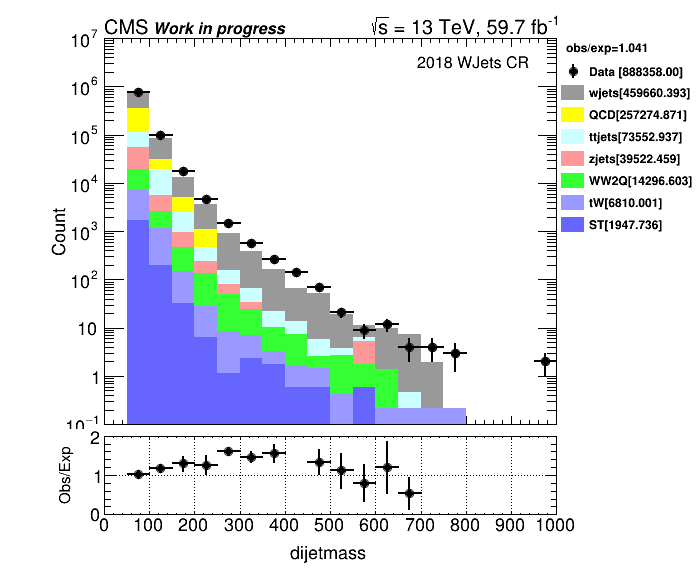

In [50]:
PlotMaker(Region_A_ShapeFromC,'dijetmass',50)

['ST', 'tW', 'WW2Q', 'zjets', 'ttjets', 'QCD', 'wjets']


(<cppyy.gbl.TCanvas object at 0x84c88e0>,
 <cppyy.gbl.TLegend object at 0x94e3dc0>)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


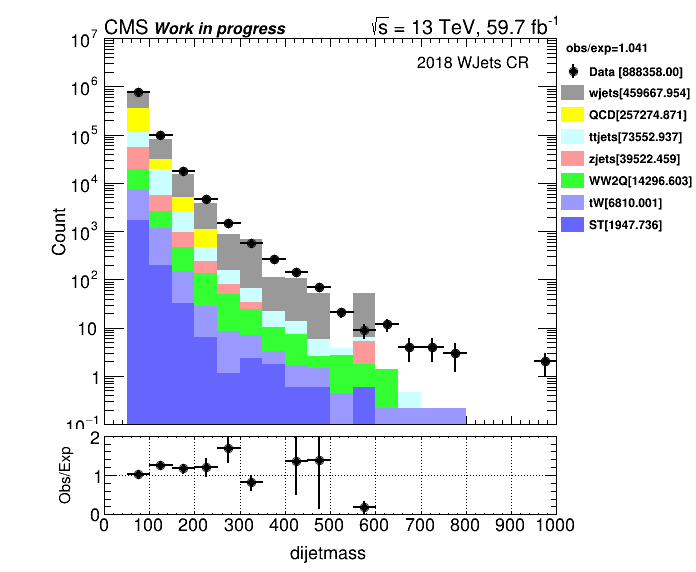

In [51]:
PlotMaker(Region_A_PostABCD,'dijetmass',50)

['ST', 'tW', 'WW2Q', 'zjets', 'ttjets', 'QCD', 'wjets']


(<cppyy.gbl.TCanvas object at 0x905f5e0>,
 <cppyy.gbl.TLegend object at 0x915c4f0>)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


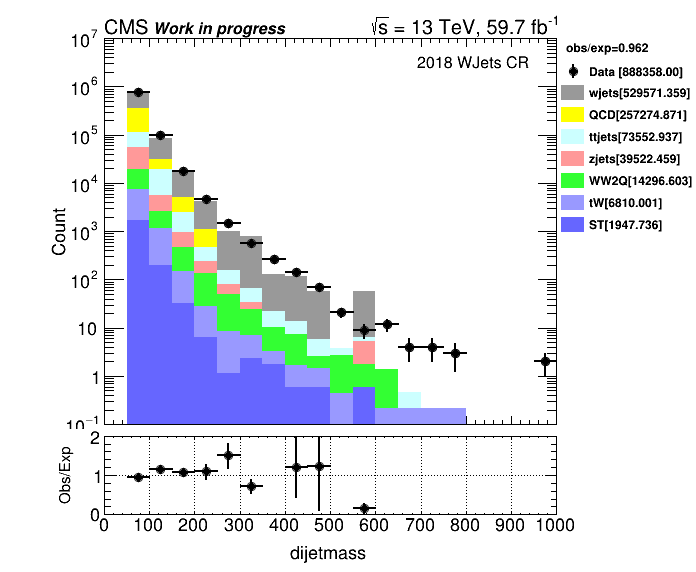

In [52]:
PlotMaker(Region_A,'dijetmass',50)